# U.S. Medical Insurance Costs

## 1 Introduction


This project will analyze the cost of medical treatment in the US. The purpose of the analysis is to find the main factors that affect the price of insurance. In addition, it is important to draw conclusions on what aspects of daily life can be improved to reduce insurance costs.

### 1.1 Importing relevant extensions

In [60]:
import pandas as pd
import pprint as pprint
import numpy as np

## 2. Data Exploration

Database import

In [61]:
db = pd.read_csv('insurance.csv')

Database preview

In [62]:
print(db.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [63]:
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


The database consists of 7 columns and 1338 records. No empty cells were found. The database appears to be well prepared. Since the database was provided for educational purposes, it is cleaned. The database cleaning phase will be skipped.

### 2.1. Descriptive Statistics

Calculatig the following:
- mean
- median
- standard deviation
- quartiles

In [75]:
db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

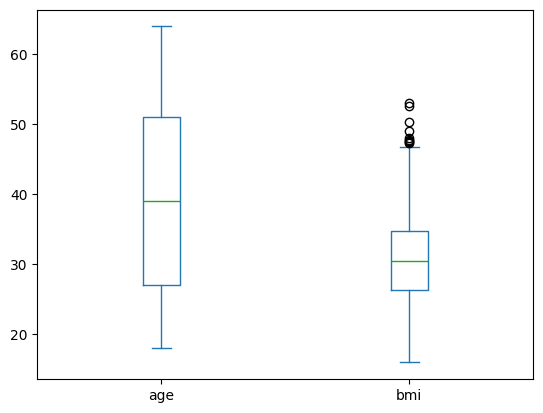

In [84]:
db[['age','bmi']].plot.box()

For the BMI column, there have been several values that could be considered atypical. For the BMI indicator, these cases lie in the group of overly obese people. This is likely.

<Axes: >

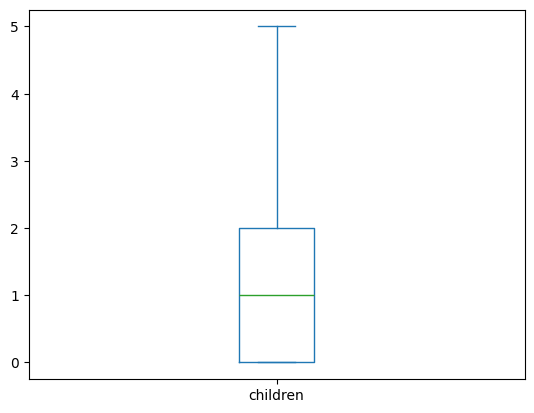

In [82]:
db['children'].plot.box()

<Axes: >

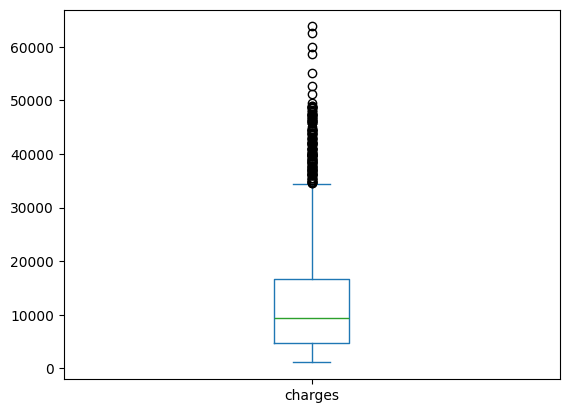

In [83]:
db['charges'].plot.box()

This chart shows that a huge number of people have excessively high insurance costs compared to other people. It should be determined what could be the reasons for this, i.e. which factors have the greatest impact on the price of insurance.

In order to obtain information about the distribution of the data, graphs of distrubution were plotted

1. Data Exploration:
Descriptive Statistics:
Begin by calculating basic descriptive statistics for each variable (mean, median, standard deviation, etc.) to understand the central tendency and variability in the data.
Data Visualization:
Create visualizations such as histograms, box plots, and scatter plots to visually explore the distribution and relationships between variables.
2. Data Cleaning:
Missing Values:
Identify and handle missing values. You may impute missing values based on the context or choose to remove rows or columns with missing data.
Outliers:
Detect and address outliers that might skew your analysis. This can be done using visualizations or statistical methods.
3. Feature Engineering:
Create Derived Features:
Generate new features that might be relevant for the analysis, such as creating a BMI category or calculating the total number of dependents.
Encoding Categorical Variables:
If your data includes categorical variables (like gender), encode them numerically for machine learning models.
4. Statistical Analysis:
Correlation Analysis:
Calculate correlation coefficients to understand the relationships between continuous variables (e.g., age, BMI) and the target variable (insurance costs).
Chi-square Test:
Use the chi-square test for independence to analyze relationships between categorical variables.
ANOVA:
Perform analysis of variance (ANOVA) to understand if there are significant differences in insurance costs across different categories (e.g., age groups, BMI categories).